In [1]:
# Notebook to find the "volume capture metric" with respect to FDR confidence map

from genericpath import isfile
import os
import sys
import shutil
import subprocess
import numpy as np
from datetime import datetime
from joblib import Parallel, delayed




EMDB_PDB_ids_training = ["0026_6gl7", "7573_6crv",  "0665_6oa9", "0038_6gml", "0071_6gve", "0093_6gyn", "0094_6gyo", "0132_6h3c", "0234_6hjn", "0408_6nbd", "0415_6nbq", "4288_6fo2", "0452_6nmi", "0490_6nr8", "0492_6nra", "0567_6o0h", "0589_6nmi", "0592_6o1m", "0776_6ku9", "10049_6rx4", "10069_6s01", "10100_6s5t", "10105_6s6t", "10106_6s6u", "10273_6sof", "10279_6sp2", "10324_6swe", "10333_6swy", "10418_6t9n", "10534_6tni", "10585_6ttu", "10595_6tut", "10617_6xt9", "20145_6oo4", "20146_6oo5", "20189_6osy", "20234_6p19", "20249_6p4h", "20254_6p5a", "20259_6p62", "20270_6p7v", "20271_6p7w", "20352_6pik", "20521_6pxm", "20986_6v0b", "21012_6v1i", "21107_6v8o", "21144_6vbu", "21391_6vv5", "3661_5no2", "3662_5no3", "3802_5of4", "3885_6el1", "3908_6eoj", "4032_5lc5", "4073_5lmn", "4074_5lmo", "4079_5lmt", "4148_5m3m", "4162_6ezo", "4192_6f6w", "4214_6fai", "4241_6fe8", "4272_6fki", "4401_6i2x", "4404_6i3m", "4429_6i84", "4588_6qm5", "4589_6qm6", "4593_6qma", "4728_6r5k", "4746_6r7x", "4759_6r8f", "4888_6ric", "4889_6rid", "4890_6rie", "4907_6rkd", "4917_6rla", "4918_6rlb", "4941_6rn3", "4983_6rqj", "7009_6ave", "7041_6b3q", "7065_6b7y", "7090_6bf6", "7334_6c23", "7335_6c24", "8911_6dt0", "8958_6e1n", "8960_6e1p", "9258_6muw", "9259_6mux", "9931_6k7g", "9934_6k7i", "9935_6k7j", "9939_6k7l", "9941_6k7m", "9695_6iok"]
EMDB_PDB_ids_validation = ["0193_6hcg", "0257_6hra", "0264_6hs7", "0499_6nsk", "10401_6t8h", "20449_6pqo", "20849_6uqk", "4611_6qp6", "4646_6qvb", "4733_6r69", "4789_6rb9", "7133_6bqv", "7882_6dg7", "8069_5i08", "9112_6mgv", "9298_6mzc", "9374_6nhv"]
EMDB_PDB_ids_epsilon = ["0282_6huo", "0311_6hz5", "0560_6nzu", "10365_6t23", "20220_6oxl", "20226_6p07", "3545_5mqf", "4141_5m1s", "4531_6qdw", "4571_6qk7", "4997_6rtc", "7127_6bpq",  "8702_5vkq", "9610_6adq"]
EMDB_PDB_ids_all = EMDB_PDB_ids_training + EMDB_PDB_ids_validation + EMDB_PDB_ids_epsilon

res_dict = {"0026" : 6.3, "0038" : 3.2, "0071" : 3.9, "0093" : 3.4, "0094" : 3.4, "0132" : 3.9, "0234" : 3.3, "0408" : 3.2, "0415" : 3.1, "4288" : 4.4, "0452" : 3.7, "0490" : 7.8, "0492" : 7.7, "0567" : 3.67, "0589" : 3.9, "0592" : 3.15, "0665" : 3.9, "0776" : 2.67, "10049" : 3.3, "10069" : 3.2, "10100" : 4.15, "10105" : 4.1, "10106" : 3.5, "10273" : 4.3, "10279" : 3.33, "10324" : 3.1, "10333" : 3.2, "10418" : 2.96, "10534" : 3.4, "10585" : 3.7, "10595" : 3.25, "10617" : 3.8, "20145" : 3.3, "20146" : 4.2, "20189" : 4.3, "20234" : 3.8, "20249" : 3.2, "20254" : 3.6, "20259" : 3.57, "20270" : 4, "20271" : 4.1, "20352" : 7.8, "20521" : 2.1, "20986" : 4.1, "21012" : 3.8, "21107" : 3.07, "21144" : 3.1, "21391" : 3.5, "3661" : 5.16, "3662" : 5.16, "3802" : 4.4, "3885" : 6.1, "3908" : 3.55, "4032" : 4.35, "4073" : 3.55, "4074" : 4.3, "4079" : 4.15, "4148" : 4, "4162" : 4.1, "4192" : 3.81, "4214" : 3.4, "4241" : 4.1, "4272" : 4.3, "4401" : 3.35, "4404" : 3.93, "4429" : 4.4, "4588" : 3.6, "4589" : 3.7, "4593" : 3.7, "4728" : 4.8, "4746" : 3.47, "4759" : 3.8, "4888" : 2.8, "4889" : 2.9, "4890" : 3.1, "4907" : 3.2, "4917" : 3.9, "4918" : 4.5, "4941" : 4, "4983" : 3.5, "7009" : 3.7, "7041" : 3.7, "7065" : 6.5, "7090" : 6.5, "7334" : 3.9, "7335" : 3.5, "8911" : 3.7, "8958" : 3.7, "8960" : 3.7, "9258" : 3.6, "9259" : 3.9, "9931" : 3.3, "9934" : 3.22, "9935" : 3.08, "9939" : 2.83, "9941" : 2.95, "9695" : 3.64, "0193" : 4.3, "0257" : 3.7, "0264" : 4.6, "0499" : 2.7, "10401" : 3.77, "20449" : 2.88, "20849" : 3.77, "4611" : 3.2, "4646" : 4.34, "4733" : 3.65, "4789" : 3.2, "7133" : 3.1, "7882" : 3.32, "8069" : 4.04, "9112" : 3.1, "9298" : 4.5, "9374" : 3.5, "0282" : 3.26, "0311" : 4.2, "0560" : 3.2, "10365" : 3.1, "20220" : 3.5, "20226" : 3.2, "3545" : 5.9, "4141" : 6.7, "4531" : 2.83, "4571" : 3.3, "4997" : 3.96, "7127" : 4.1, "7573" : 3.2, "8702" : 3.55, "9610" : 3.5}

symmetry_dictionary = {'0026': 'C2', '0038': 'C1', '0071': 'D2', '0093': 'C4', '0094': 'C4', '0132': 'C2', '0234': 'C3', '0408': 'C2', '0415': 'C1', '4288': 'C2', '0452': 'C1', '0490': 'C1', '0492': 'C1', '0567': 'D2', '0589': 'C1', '0592': 'C2', '0665': 'C1', '0776': 'C3', '10049': 'C1', '10069': 'C1', '10100': 'C1', '10105': 'C1', '10106': 'C2', '10273': 'C1', '10279': 'C6', '10324': 'C1', '10333': 'C1', '10418': 'C4', '10534': 'C1', '10585': 'C1', '10595': 'C1', '10617': 'C1', '20145': 'C2', '20146': 'C2', '20189': 'C3', '20234': 'C1', '20249': 'C1', '20254': 'C2', '20259': 'C3', '20270': 'C1', '20271': 'C1', '20352': 'C2', '20521': 'O', '20986': 'C5', '21012': 'C9', '21107': 'C1', '21144': 'C1', '21391': 'C3', '3661': 'C1', '3662': 'C1', '3802': 'C1', '3885': 'C10', '3908': 'C1', '4032': 'C1', '4073': 'C1', '4074': 'C1', '4079': 'C1', '4148': 'C1', '4162': 'C2', '4192': 'C1', '4214': 'C1', '4241': 'C1', '4272': 'C1', '4401': 'C1', '4404': 'C2', '4429': 'C1', '4588': 'C2', '4589': 'C2', '4593': 'C2', '4728': 'C1', '4746': 'C2', '4759': 'C1', '4888': 'C1', '4889': 'C1', '4890': 'C1', '4907': 'D3', '4917': 'C2', '4918': 'C1', '4941': 'C1', '4983': 'C1', '7009': 'C3', '7041': 'C1', '7065': 'C1', '7090': 'C2', '7334': 'C1', '7335': 'C1', '8911': 'C2', '8958': 'C2', '8960': 'C2', '9258': 'C2', '9259': 'C1', '9931': 'C1', '9934': 'C1', '9935': 'C1', '9939': 'C1', '9941': 'C1', '9695': 'C1', '0193': 'C15', '0257': 'C1', '0264': 'C5', '0499': 'C6', '10401': 'C1', '20449': 'C4', '20849': 'C4', '4611': 'C2', '4646': 'C2', '4733': 'C1', '4789': 'C7', '7133': 'C4', '7882': 'C5', '8069': 'C3', '9112': 'C2', '9298': 'C1', '9374': 'C1', '0282': 'C1', '0311': 'C2', '0560': 'C2', '10365': 'C1', '20220': 'C1', '20226': 'C1', '3545': 'C1', '4141': 'C1', '4531': 'C1', '4571': 'C1', '4997': 'C2', '7127': 'C4', '7573': 'C3', '8702': 'C4', '9610': 'C2'}


In [2]:

def get_input_files(emdb_pdb, dataset_type):
    
    if dataset_type == "MB":
        suffix = "_epsilon_MB"
    elif dataset_type == "MF":
        suffix = "model_free_C1"
    elif dataset_type == "hybrid":
        suffix = "hybrid_D"
        
    else:
        suffix = ""
        data_folder_alpha = "/home/abharadwaj1/shortcuts/locscale_mapdata/collection_dataset_3"
    version = "D"
    data_folder_epsilon = "/tudelft/abharadwaj1/staff-group/tnw/bn/AJ/AB/locscale_version_delftblue/locscale_dataset_version_{}".format(suffix)
    emdb_pdb_path = os.path.join(data_folder_epsilon, emdb_pdb)
    emdb, pdb = emdb_pdb.split("_")
    try:
        symmetry = symmetry_dictionary[emdb]
    except KeyError:
        print("No symmetry information for {}".format(emdb))
        print(emdb_pdb)
        raise KeyError

    folder_containing_files = os.path.join(emdb_pdb_path)
    folder_containing_phenix_and_deposited_maps = f"/home/abharadwaj1/papers/elife_paper/figure_information/outputs/figure_3/qscores/{emdb_pdb}/"
    phenix_sharpened_map_path_1 = os.path.join(folder_containing_phenix_and_deposited_maps, "emd_{}_phenix_sharpened.map".format(emdb))
    phenix_sharpened_map_path_2 = os.path.join(folder_containing_phenix_and_deposited_maps, "emd_{}_Phenix.map".format(emdb))
    
    atomic_model_mask = f"/home/abharadwaj1/dev/map_sharpening/locscale_analysis/locscale_analysis_files/locscale_mapdata/collection_dataset_3/{emdb_pdb}/emd_{emdb}_MB_locscale_processing_files/PDB_{pdb}_unrefined_shifted_servalcat_refined_model_mask.mrc"

    if os.path.exists(phenix_sharpened_map_path_1):
        phenix_sharpened_map_path = phenix_sharpened_map_path_1
    elif os.path.exists(phenix_sharpened_map_path_2):
        phenix_sharpened_map_path = phenix_sharpened_map_path_2
    else:
        phenix_sharpened_map_path = "none"

    #deposited_map = f"/tudelft/abharadwaj1/staff-umbrella/ajlab/students/MEP/2021/RB/mapdata/{emdb_pdb}/EMDBmaps/sharpened_maps/emd_{emdb}_deposited.map"
    deposited_map = os.path.join(folder_containing_phenix_and_deposited_maps, "emd_{}_deposited.map".format(emdb))

    model_based_locscale_file = os.path.join(folder_containing_files, "emd_{}_model_based_locscale{}.mrc".format(emdb, version))
    model_free_locscale_file = os.path.join(folder_containing_files, "emd_{}_model_free_locscale_{}.mrc".format(emdb, version))
    model_based_integrated_locscale_file = os.path.join(folder_containing_files, "emd_{}_hybrid_locscale_{}.mrc".format(emdb, version))

    MB_processing_file = os.path.join(folder_containing_files, "emd_{}_MB_locscale_processing_files{}".format(emdb, suffix))
    refined_pdb_path = os.path.join(MB_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined.pdb".format(pdb))
    refined_shifted_pdb_path = os.path.join(MB_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined_shifted_bfactors.pdb".format(pdb))
    refined_model_map_path = os.path.join(MB_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined_shifted_bfactors_4locscale.mrc".format(pdb))


    MF_processing_file = os.path.join(folder_containing_files, "emd_{}_model_free_locscale_processing_C1".format(emdb, suffix))
    
    refined_pseudomodel_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition.pdb".format(emdb))
    refined_shifted_pseudomodel_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors.pdb".format(emdb))
    
    if symmetry == "C1":
        refined_pseudo_model_map_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors_4locscale.mrc".format(emdb))
    else:
        refined_pseudo_model_map_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors_4locscale_{}_symmetry.mrc".format(emdb,symmetry))
    
    MB_integrated_processing_file = os.path.join(folder_containing_files, "emd_{}_hybrid_locscale_processing_{}".format(emdb, version))
    refined_integrated_pdb_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined_shifted_integrated_pseudoatoms_proper_element_composition.cif".format(pdb))
    refined_integrated_shifted_pdb_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined_shifted_integrated_pseudoatoms_proper_element_composition_shifted_bfactors..cif".format(pdb))
    if symmetry == "C1":
        refined_integrated_model_map_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined_shifted_integrated_pseudoatoms_proper_element_composition_shifted_bfactors._4locscale.mrc".format(pdb))
    else:
        refined_integrated_model_map_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined_shifted_integrated_pseudoatoms_proper_element_composition_shifted_bfactors._4locscale_{}_symmetry.mrc".format(pdb, symmetry))
    
    if dataset_type == "MB":
        target_processing_file = MB_processing_file
        target_pdb_path = refined_pdb_path
        target_shifted_pdb_path = refined_shifted_pdb_path
        target_model_map_path = refined_model_map_path
        target_sharpened_file = model_based_locscale_file
    elif dataset_type == "MF":
        target_processing_file = MF_processing_file
        target_pdb_path = refined_pseudomodel_path
        target_shifted_pdb_path = refined_shifted_pseudomodel_path
        target_model_map_path = refined_pseudo_model_map_path
        target_sharpened_file = model_free_locscale_file
    elif dataset_type == "hybrid":
        target_processing_file = MB_integrated_processing_file
        target_pdb_path = refined_integrated_pdb_path
        target_shifted_pdb_path = refined_integrated_shifted_pdb_path
        target_model_map_path = refined_integrated_model_map_path
        target_sharpened_file = model_based_integrated_locscale_file
        


    unsharpened_map_file = os.path.join(target_processing_file, "EMD_{}_unsharpened_fullmap.mrc".format(int(emdb)))
    halfmap_1_file = os.path.join(target_processing_file, "emd_{}_half_map_1.map".format(emdb))
    halfmap_2_file = os.path.join(target_processing_file, "emd_{}_half_map_2.map".format(emdb))
    input_pseudomodel_path = os.path.join(target_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_uniform_biso.pdb".format(emdb))
    globally_sharpened_map_file = os.path.join(target_processing_file, "EMD_{}_unsharpened_fullmap_global_sharpened_filtered.mrc".format(int(emdb)))
    mask_file = os.path.join(target_processing_file, "emd_{}_FDR_confidence_final.map".format(emdb))
        
    input_files_emdb = {
        "model_based_locscale_file": model_based_locscale_file,
        "model_free_locscale_file": model_free_locscale_file,
        "model_based_integrated_locscale_file": model_based_integrated_locscale_file,
        "refined_pdb_path": refined_pdb_path,
        "refined_shifted_pdb_path": refined_shifted_pdb_path,
        "refined_pseudomodel_path": refined_pseudomodel_path,
        "refined_integrated_pdb_path": refined_integrated_pdb_path,
        "unsharpened_map_file": unsharpened_map_file,
        "globally_sharpened_map_file": globally_sharpened_map_file,
        "mask_file": mask_file,
        "halfmap_1_file": halfmap_1_file,
        "halfmap_2_file": halfmap_2_file,
        "refined_model_map_path": refined_model_map_path,
        "refined_pseudo_model_map_path": refined_pseudo_model_map_path,
        "refined_integrated_model_map_path": refined_integrated_model_map_path,
        "target_processing_file": target_processing_file,
        "target_pdb_path": target_pdb_path,
        "target_shifted_pdb_path": target_shifted_pdb_path,
        "target_model_map_path": target_model_map_path,
        "target_sharpened_file": target_sharpened_file,
        "phenix_sharpened_map_path": phenix_sharpened_map_path,
        "deposited_map_path": deposited_map,
        "atomic_model_mask" : atomic_model_mask,
        "input_pseudomodel_path": input_pseudomodel_path,
    }

    # Check if all input files exist and if not then change the value of the dictionary to None
    # for key, value in input_files_emdb.items():
    #     if not os.path.exists(value):
    #         input_files_emdb[key] = None
    return input_files_emdb

# %%
# %%
# Load the input files for the EMDB
input_files_emdb = {}

emdb_pdbs_present = []
for emdb_pdb in EMDB_PDB_ids_all:
    input_files_temp = get_input_files(emdb_pdb, "hybrid")
    
    required_files = ["unsharpened_map_file","model_based_integrated_locscale_file","target_shifted_pdb_path","target_pdb_path", "mask_file", "target_model_map_path"]
    print("Checking if all required files exist for {}".format(emdb_pdb))
    print("===============================================")
    # Check if all required files exist and print a warning if not
    missing_files = []
    for required_file in required_files:
       
        if not os.path.exists(input_files_temp[required_file]):
            print("\t{} missing".format(required_file))
            missing_files.append((required_file))
            print("\t\t{}".format(input_files_temp[required_file]))

    if len(missing_files) == 0:
        input_files_emdb[emdb_pdb] = {}
        for key in required_files:
            input_files_emdb[emdb_pdb][key] = input_files_temp[key]

# Number of EMDBs with all required files
print("Number of EMDBs with all required files: {}".format(len(input_files_emdb)))
print("===============================================")
print("Number of EMDBs with missing files: {}".format(len(EMDB_PDB_ids_all) - len(input_files_emdb)))

        
print("===============================================")

def copy_files_to_folder(file, folder):
    # if copied file already exists then ignore 
    test_copied_path = os.path.join(folder, os.path.basename(file))
    if os.path.exists(test_copied_path):
        print("File already exists: {}".format(test_copied_path))
        return test_copied_path
    
    if not os.path.exists(folder):
        os.makedirs(folder)
    new_path = shutil.copy(file, folder)
    return new_path

Checking if all required files exist for 0026_6gl7
Checking if all required files exist for 7573_6crv
Checking if all required files exist for 0665_6oa9
Checking if all required files exist for 0038_6gml
Checking if all required files exist for 0071_6gve
Checking if all required files exist for 0093_6gyn
Checking if all required files exist for 0094_6gyo
Checking if all required files exist for 0132_6h3c
Checking if all required files exist for 0234_6hjn
	model_based_integrated_locscale_file missing
		/tudelft/abharadwaj1/staff-group/tnw/bn/AJ/AB/locscale_version_delftblue/locscale_dataset_version_hybrid_D/0234_6hjn/emd_0234_hybrid_locscale_D.mrc
Checking if all required files exist for 0408_6nbd
Checking if all required files exist for 0415_6nbq
Checking if all required files exist for 4288_6fo2
Checking if all required files exist for 0452_6nmi
Checking if all required files exist for 0490_6nr8
Checking if all required files exist for 0492_6nra
Checking if all required files exist fo

In [3]:
from tqdm import tqdm
local_copy_folder = "/home/abharadwaj1/dev/current_focus/analysis_on_version_A/locscale_hybrid_version_D/"
if not os.path.exists(local_copy_folder):
    os.makedirs(local_copy_folder)

# Copy all the files to a local folder for easy access
input_files_local = {}
for emdb_pdb, input_files in tqdm(input_files_emdb.items()):
    local_emdb_folder = os.path.join(local_copy_folder, emdb_pdb)
    if not os.path.exists(local_emdb_folder):
        os.makedirs(local_emdb_folder)

    input_files_local[emdb_pdb] = {}
    for key, value in input_files.items():
        if value is not None:
            input_files_local[emdb_pdb][key] = copy_files_to_folder(value, local_emdb_folder)
        else:
            print("Skipping {} for {}".format(key, emdb_pdb))
            continue

  0%|          | 0/117 [00:00<?, ?it/s]

File already exists: /home/abharadwaj1/dev/current_focus/analysis_on_version_A/locscale_hybrid_version_D/0026_6gl7/EMD_26_unsharpened_fullmap.mrc
File already exists: /home/abharadwaj1/dev/current_focus/analysis_on_version_A/locscale_hybrid_version_D/0026_6gl7/emd_0026_hybrid_locscale_D.mrc
File already exists: /home/abharadwaj1/dev/current_focus/analysis_on_version_A/locscale_hybrid_version_D/0026_6gl7/PDB_6gl7_unrefined_shifted_servalcat_refined_shifted_integrated_pseudoatoms_proper_element_composition_shifted_bfactors..cif
File already exists: /home/abharadwaj1/dev/current_focus/analysis_on_version_A/locscale_hybrid_version_D/0026_6gl7/PDB_6gl7_unrefined_shifted_servalcat_refined_shifted_integrated_pseudoatoms_proper_element_composition.cif
File already exists: /home/abharadwaj1/dev/current_focus/analysis_on_version_A/locscale_hybrid_version_D/0026_6gl7/emd_0026_FDR_confidence_final.map
File already exists: /home/abharadwaj1/dev/current_focus/analysis_on_version_A/locscale_hybrid_ve

100%|██████████| 117/117 [00:00<00:00, 711.45it/s]

File already exists: /home/abharadwaj1/dev/current_focus/analysis_on_version_A/locscale_hybrid_version_D/20271_6p7w/EMD_20271_unsharpened_fullmap.mrc
File already exists: /home/abharadwaj1/dev/current_focus/analysis_on_version_A/locscale_hybrid_version_D/20271_6p7w/emd_20271_hybrid_locscale_D.mrc
File already exists: /home/abharadwaj1/dev/current_focus/analysis_on_version_A/locscale_hybrid_version_D/20271_6p7w/PDB_6p7w_unrefined_shifted_servalcat_refined_shifted_integrated_pseudoatoms_proper_element_composition_shifted_bfactors..cif
File already exists: /home/abharadwaj1/dev/current_focus/analysis_on_version_A/locscale_hybrid_version_D/20271_6p7w/PDB_6p7w_unrefined_shifted_servalcat_refined_shifted_integrated_pseudoatoms_proper_element_composition.cif
File already exists: /home/abharadwaj1/dev/current_focus/analysis_on_version_A/locscale_hybrid_version_D/20271_6p7w/emd_20271_FDR_confidence_final.map
File already exists: /home/abharadwaj1/dev/current_focus/analysis_on_version_A/locscale

In [4]:
# First find the intensity distribution for all the locscale sharpened maps 
from locscale.include.emmer.ndimage.map_utils import load_map

intensity_distribution = {}
sample_size = 1000 
for emdb_pdb, input_files in input_files_local.items():
    locscale_map_path = input_files["model_based_integrated_locscale_file"]
    locscale_map, apix = load_map(locscale_map_path)

    # Get the intensity distribution for the map at random points
    rand_x = np.random.randint(0, locscale_map.shape[0], sample_size)
    rand_y = np.random.randint(0, locscale_map.shape[1], sample_size)
    rand_z = np.random.randint(0, locscale_map.shape[2], sample_size)

    # rand_points = np.vstack((rand_x, rand_y, rand_z)).T
    # rand_points = rand_points.astype(np.int)

    intensities = locscale_map[rand_x, rand_y, rand_z]
    intensity_distribution[emdb_pdb] = intensities

    print(f"EMDB: {emdb_pdb}, Min: {np.min(intensities):.2f}, 25th: {np.percentile(intensities, 25):.2f}, 50th: {np.percentile(intensities, 50):.2f}, 75th: {np.percentile(intensities, 75):.2f}, 90th: {np.percentile(intensities, 90):.2f}, 95th: {np.percentile(intensities, 95):.2f}, 99th: {np.percentile(intensities, 99):.2f}, Max: {np.max(intensities):.2f}")






EMDB: 0026_6gl7, Min: -0.01, 25th: -0.00, 50th: -0.00, 75th: 0.00, 90th: 0.00, 95th: 0.00, 99th: 0.01, Max: 0.20
EMDB: 7573_6crv, Min: -0.00, 25th: -0.00, 50th: 0.00, 75th: 0.00, 90th: 0.00, 95th: 0.00, 99th: 0.09, Max: 0.19
EMDB: 0665_6oa9, Min: -0.01, 25th: 0.00, 50th: 0.00, 75th: 0.00, 90th: 0.00, 95th: 0.03, 99th: 0.14, Max: 0.38
EMDB: 0038_6gml, Min: -0.01, 25th: 0.00, 50th: 0.00, 75th: 0.00, 90th: 0.00, 95th: 0.05, 99th: 0.15, Max: 0.42
EMDB: 0071_6gve, Min: -0.00, 25th: -0.00, 50th: 0.00, 75th: 0.00, 90th: 0.00, 95th: 0.00, 99th: 0.04, Max: 0.32
EMDB: 0093_6gyn, Min: -0.01, 25th: -0.00, 50th: 0.00, 75th: 0.00, 90th: 0.00, 95th: 0.00, 99th: 0.08, Max: 0.31
EMDB: 0094_6gyo, Min: -0.02, 25th: -0.00, 50th: -0.00, 75th: 0.00, 90th: 0.00, 95th: 0.00, 99th: 0.13, Max: 0.31
EMDB: 0132_6h3c, Min: -0.14, 25th: -0.00, 50th: 0.00, 75th: 0.00, 90th: 0.00, 95th: 0.00, 99th: 0.08, Max: 0.33
EMDB: 0408_6nbd, Min: -0.08, 25th: -0.00, 50th: 0.00, 75th: 0.00, 90th: 0.00, 95th: 0.00, 99th: 0.11, Ma

In [5]:
min_intensity_all_emdbs = min([np.min(intensity_distribution[emdb_pdb]) for emdb_pdb in intensity_distribution.keys()])
max_intensity_all_emdbs = max([np.max(intensity_distribution[emdb_pdb]) for emdb_pdb in intensity_distribution.keys()])

print(f"Min intensity: {min_intensity_all_emdbs:.2f}, Max intensity: {max_intensity_all_emdbs:.2f}")

Min intensity: -0.31, Max intensity: 0.90


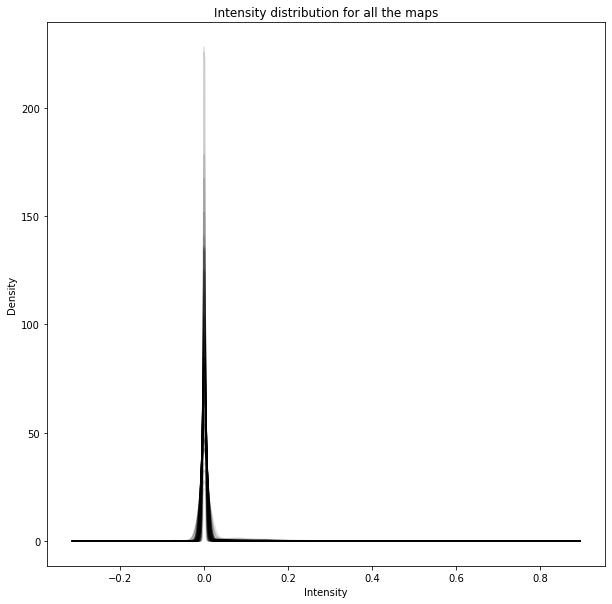

In [7]:
# Plot the intensity distribution for all the maps as a kde plot
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10,10))
for emdb_pdb, intensities in intensity_distribution.items():
    kde = gaussian_kde(intensities)
    x = np.linspace(min_intensity_all_emdbs, max_intensity_all_emdbs, 1000)
    y = kde(x)
    ax.plot(x, y, "k",alpha=0.1)
    ax.set_xlabel("Intensity")
    ax.set_ylabel("Density")
    ax.set_title("Intensity distribution for all the maps")
    fig.savefig("intensity_distribution.png")


In [8]:
# Plot the volume as a function of threshold for all the maps 

threshold_range = np.linspace(0.001, 0.025, 100)
volume_threshold = {}
for emdb_pdb, input_files in tqdm(input_files_local.items()):
    locscale_map_path = input_files["model_based_integrated_locscale_file"]
    locscale_map, apix = load_map(locscale_map_path)

    volume_threshold[emdb_pdb] = []
    for threshold in threshold_range:
        volume_threshold[emdb_pdb].append(np.sum(locscale_map >= threshold) * apix**3)

  3%|▎         | 4/117 [00:26<12:36,  6.70s/it]


KeyboardInterrupt: 

Text(0.5, 1.0, 'Volume as a function of threshold for all the maps')

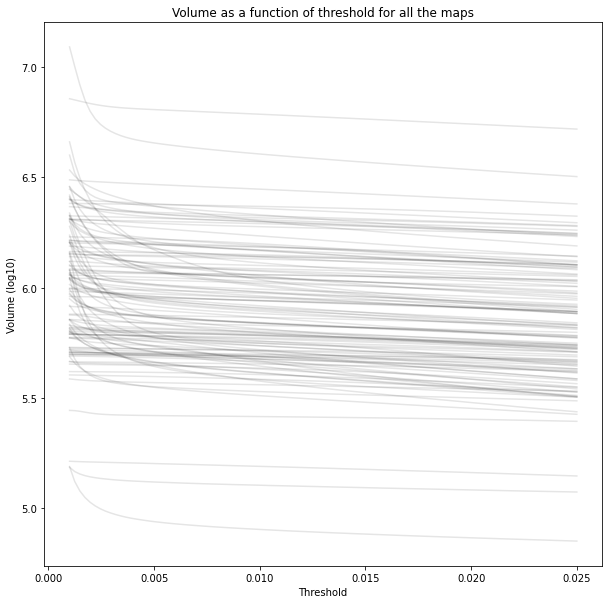

In [ ]:
# Plot the volume as a function of threshold for all the maps
# use log10 scale for the y axis
fig, ax = plt.subplots(1,1, figsize=(10,10))
x_data = threshold_range
y_data = np.array([np.array(volume_threshold[emdb_pdb]) for emdb_pdb in volume_threshold.keys()])
y_data = np.log10(y_data)

ax.plot(x_data, y_data.T, "k", alpha=0.1)
ax.set_xlabel("Threshold")
ax.set_ylabel("Volume (log10)")
ax.set_title("Volume as a function of threshold for all the maps")



In [ ]:
volume_threshold_modmap = {}
for emdb_pdb, input_files in tqdm(input_files_local.items()):
    modmap_map_path = input_files["target_model_map_path"]
    modmap_map, apix = load_map(modmap_map_path)

    volume_threshold_modmap[emdb_pdb] = []
    for threshold in threshold_range:
        volume_threshold_modmap[emdb_pdb].append(np.sum(modmap_map >= threshold) * apix**3)

100%|██████████| 117/117 [07:20<00:00,  3.76s/it]


Text(0.5, 1.0, 'Volume as a function of threshold for all the maps')

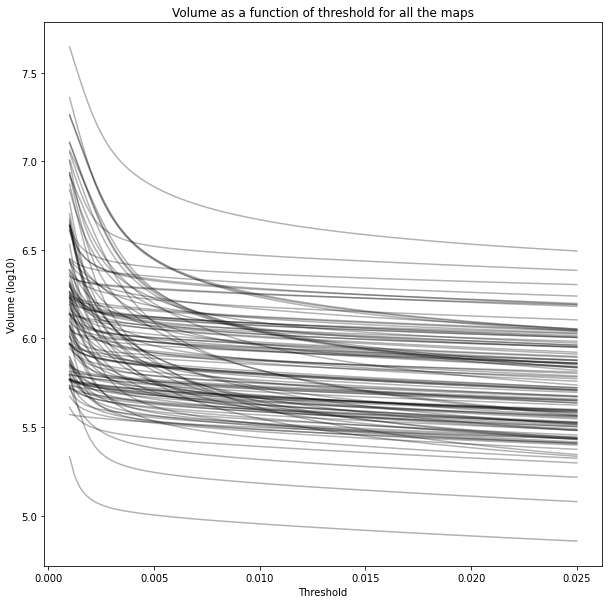

In [ ]:
# Plot the volume as a function of threshold for all the maps
# use log10 scale for the y axis
fig, ax = plt.subplots(1,1, figsize=(10,10))
x_data = threshold_range
y_data = np.array([np.array(volume_threshold_modmap[emdb_pdb]) for emdb_pdb in volume_threshold_modmap.keys()])
y_data = np.log10(y_data)

ax.plot(x_data, y_data.T, "k", alpha=0.3)
ax.set_xlabel("Threshold")
ax.set_ylabel("Volume (log10)")
ax.set_title("Volume as a function of threshold for all the maps")



In [ ]:
deposited_threshold_dict["665"]

0.45

In [23]:
def similarity_threshold(reference_map, threshold_reference, target_map, num_bins=100):
    from locscale.include.emmer.ndimage.map_tools import compute_real_space_correlation as rsc
    from locscale.include.emmer.ndimage.map_utils import binarizeMap, load_map, parse_input
    import math
    reference_map = parse_input(reference_map)
    target_map = parse_input(target_map)

    masked_reference = (reference_map >= threshold_reference).astype(bool)
    masked_target = target_map[masked_reference]
    masked_target_nonzero = masked_target[masked_target > 0.0005]
    min_score = masked_target_nonzero.min() 
    threshold_range_target = np.linspace(min_score, masked_target.max(), num_bins)
    
    binarised_reference = masked_reference.astype(np.int_)
    rscc = {}
    for threshold in threshold_range_target:
        binarised_target = binarizeMap(target_map, threshold)
        rscc[threshold] = rsc(binarised_reference, binarised_target)
    
    # remove the nan values
    rscc_clean = {k: v for k, v in rscc.items() if not math.isnan(v)}
    max_rscc_threshold = max(rscc_clean, key=rscc.get)
    print(rscc)
    print(max_rscc_threshold)
    
    return rscc_clean, max_rscc_threshold
from sklearn.metrics import precision_recall_fscore_support as prfs
def get_precision_recall(emdb_pdb, confidence_map_path, locscale_map, deposited_map, locscale_threshold):
    emdb, pdb = emdb_pdb.split("_")
    try:
        reported_threshold = deposited_threshold_dict[str(int(emdb))]
    except KeyError:
        print("No threshold for this map")
        return None
    # import precision, recall, f1_score from sklearn

    
    confidence_map, apix = load_map(confidence_map_path)
    confidence_map_binarised = (confidence_map >= 0.99).astype(np.int_)

    pr_scores = []
    
    locscale_map, apix = load_map(locscale_map)
    locscale_map_binarised = (locscale_map >= locscale_threshold).astype(np.int_)

    deposited_map, apix = load_map(deposited_map)
    deposited_map_binarised = (deposited_map >= reported_threshold).astype(np.int_)

    # compute the precision, recall, f1_score for the locscale map
    locscale_precision, locscale_recall, locscale_f1_score, _ = prfs(confidence_map_binarised.flatten(), locscale_map_binarised.flatten(), average="binary")
    pr_scores.append((locscale_precision, locscale_recall, locscale_f1_score))

    # compute the precision, recall, f1_score for the deposited map
    deposited_precision, deposited_recall, deposited_f1_score, _ = prfs(confidence_map_binarised.flatten(), deposited_map_binarised.flatten(), average="binary")
    pr_scores.append((deposited_precision, deposited_recall, deposited_f1_score))
    pr_scores.append((emdb_pdb))

    return pr_scores

    
    


In [10]:
emdb_pdbs_containing_all_files = [x for x in input_files_local.keys() if os.path.exists(get_input_files(x, "hybrid")["deposited_map_path"])]

In [11]:
deposited_threshold_dict = {"38":0.00596,"71":0.00952,"93":0.7,"94":0.7,"234":1,"408":0.045,"415":0.04,"4288":0.0548,"452":0.0172,"490":0.55,"589":0.015,"592":0.237,"665":0.45,"10049":0.052,"10100":0.1,"10105":0.09,"10106":0.09,"10273":0.015,"10279":0.7,"10324":0.004,"10333":0.0306,"10418":0.015,"10595":0.075,"20145":0.06,"20146":0.025,"20189":0.45,"20234":0.0204,"20259":0.08,"20352":9,"20521":0.8,"21107":0.03,"21391":0.035,"3661":0.07,"3662":0.06,"3908":0.15,"4032":0.165,"4073":0.09,"4074":0.05,"4079":0.08,"4148":0.04,"4241":0.0664,"4272":0.05,"4404":0.055,"4429":0.0173,"4588":0.0431,"4589":0.033,"4593":0.065,"4728":0.014,"4746":0.017,"4759":0.055,"4907":0.068,"4941":0.05,"4983":0.009,"7009":3.93,"7334":0.0119,"7335":0.0383,"8911":0.07,"8958":8,"8960":8,"9258":5,"9259":6,"9931":0.015,"9934":0.015,"9935":0.015,"257":0.04,"264":0.04,"499":0.06,"20449":0.025,"20849":3.5,"4611":0.04,"4646":0.023,"4733":0.018,"4789":0.045,"8069":0.0335,"9112":0.0728,"9298":0.06,"9374":7.26,"311":0.024,"560":0.0425,"20220":1.1,"20226":1.12,"3545":0.016,"4141":0.08,"4531":0.002,"7127":0.07,"7573":0.044,"8702":10,"9610":0.0452}


In [12]:
deposited_threshold_dict["9610"]

0.0452

In [25]:
import joblib
# Get the precision, recall and f1_score for all the maps
precision_recall_f1score_all_maps = []

results_0_1 = joblib.Parallel(n_jobs=20)(joblib.delayed(get_precision_recall)(
    emdb_pdb,
    input_files_local[emdb_pdb]["mask_file"],
    input_files_local[emdb_pdb]["model_based_integrated_locscale_file"], 
    get_input_files(emdb_pdb, "hybrid")["deposited_map_path"],
    0.1,
    ) for emdb_pdb in tqdm(emdb_pdb_test))


100%|██████████| 3/3 [00:00<00:00, 558.45it/s]


In [34]:
ind = 2
print(results_0_1[ind][2], results_0_1[ind][0][1], results_0_1[ind][1][1])

9610_6adq 0.5525902131142488 0.2732357772579962


In [17]:
# Find recall scores for deposited and hybrid locscale maps for emdb: 20521, 0038, 9061

emdb_pdb_test = ["20145_6oo4", "0038_6gml", "9610_6adq"]

results_list = [results_0_1[x] for x in index_of_scores]
for i, emdb_pdb in enumerate(emdb_pdb_test):
    recall_score_locscale = results_list[i][0][1]
    recall_score_deposited = results_list[i][1][1]
    print(f"{emdb_pdb}, recall locscale {recall_score_locscale}, recall deposited {recall_score_deposited}")
    


IndexError: list index out of range

In [14]:
import joblib
# Get the precision, recall and f1_score for all the maps
precision_recall_f1score_all_maps = []

results_0_15 = joblib.Parallel(n_jobs=20)(joblib.delayed(get_precision_recall)(
    emdb_pdb,
    input_files_local[emdb_pdb]["mask_file"],
    input_files_local[emdb_pdb]["model_based_integrated_locscale_file"], 
    get_input_files(emdb_pdb, "hybrid")["deposited_map_path"],
    0.15,
    ) for emdb_pdb in tqdm(emdb_pdbs_containing_all_files))


100%|██████████| 99/99 [00:18<00:00,  5.22it/s] 


NameError: name 'font' is not defined

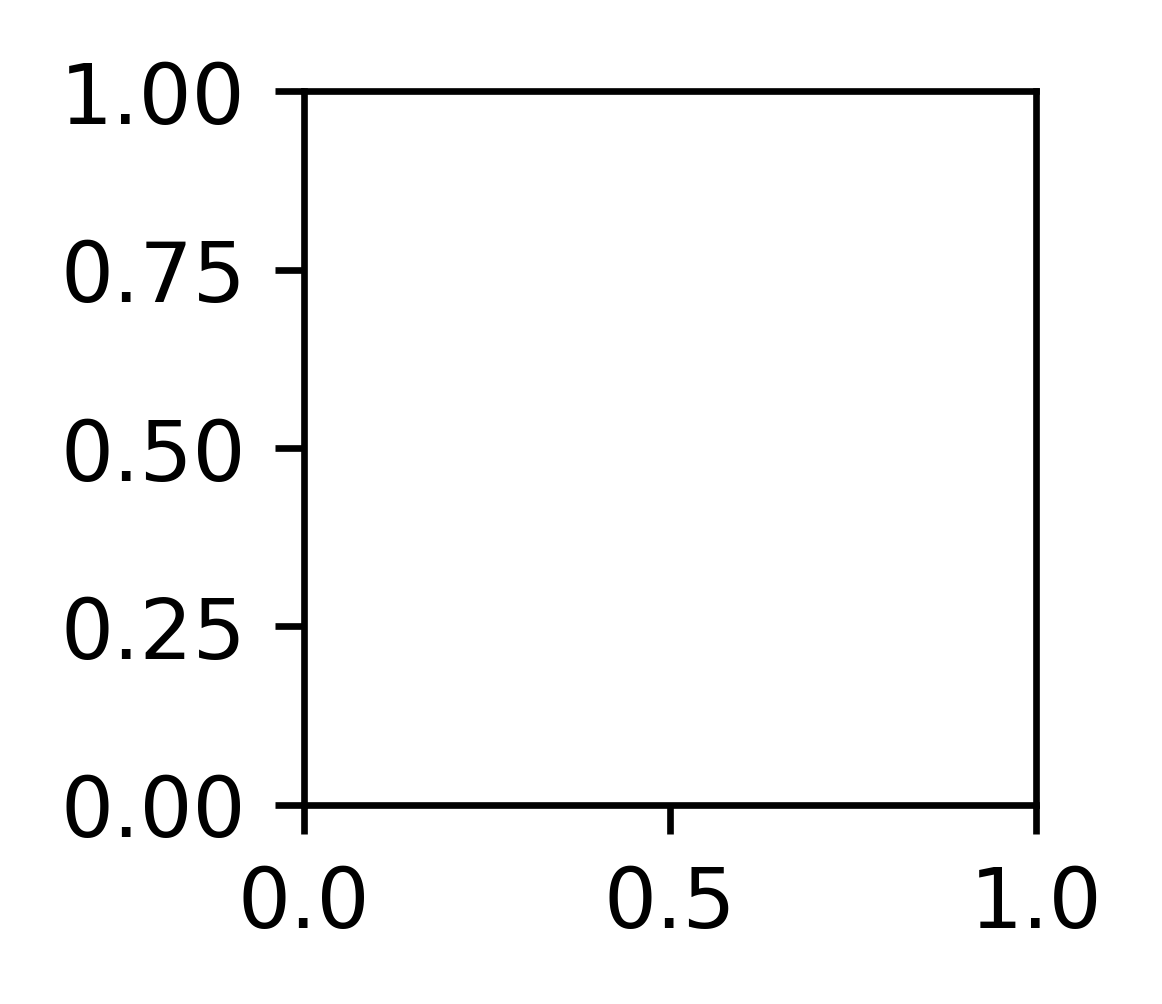

In [15]:
# filter out the results that are None
results_0_1 = [x for x in results_0_1 if x is not None]
results_0_15 = [x for x in results_0_15 if x is not None]

recall_locscale_0_1 = [x[0][1] for x in results_0_1]
recall_deposited_0_1 = [x[1][1] for x in results_0_1]
recall_locscale_0_15 = [x[0][1] for x in results_0_15]
recall_deposited_0_15 = [x[1][1] for x in results_0_15]

# Plot the recall for the locscale and deposited maps as kde plots and display the significance of the difference
import seaborn as sns
# import sklearn modules to perform the statistical tests
from scipy.stats import mannwhitneyu, ttest_ind, bootstrap

figsize_cm = (4, 4)
figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches

fig, ax1 = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality
sns.set_theme(context="paper", font=font, font_scale=0.8)
# Set font size for all text in the figure
sns.set_style("white")

# plot the recall for the locscale and deposited maps as kde plots
sns.kdeplot(recall_locscale_0_1, label="locscale", ax=ax1)
sns.kdeplot(recall_locscale_0_15, label="locscale", ax=ax1)
sns.kdeplot(recall_deposited_0_1, label="deposited", ax=ax1)
#plt.legend()

# perform the statistical tests
print("Mann Whitney U test: ", mannwhitneyu(recall_locscale_0_1, recall_deposited_0_1))
print("T test: ", ttest_ind(recall_locscale_0_1, recall_deposited_0_1))
#print("Bootstrap test: ", bootstrap([recall_locscale_0_1, recall_deposited_0_1], n_resamples=10000, statistic=np.mean))

# perform the statistical tests for the 0.15 threshold
print("Mann Whitney U test: ", mannwhitneyu(recall_locscale_0_15, recall_deposited_0_15))
print("T test: ", ttest_ind(recall_locscale_0_15, recall_deposited_0_15))
#print("Bootstrap test: ", bootstrap([recall_locscale_0_15, recall_deposited_0_15], n_resamples=10000, statistic=np.mean))
plt.xlabel("Recall")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig("recall_locscale_deposited_0_1.eps", dpi=600, bbox_inches='tight')


In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# filter out the results that are None
results = [x for x in results if x is not None]

precision_scores_hybrid_map = [x[0][0] for x in results]
recall_scores_hybrid_map = [x[0][1] for x in results]
precision_scores_deposited_map = [x[1][0] for x in results]
recall_scores_deposited_map = [x[1][1] for x in results]

# Plot the precision and recall for the hybrid map as 2D histogram
fontsize=2
figsize_cm = [4,4]
# font = "Helvetica"
fontscale = 1.0    
## Headers
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
# set the global font size for the plot

    
plt.rcParams.update({'font.size': fontsize})
figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches

fig, ax1 = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality
sns.set_theme(context="paper", font=font, font_scale=fontscale)
# Set font size for all text in the figure
sns.set_style("white")

## Plot the data

sns.kdeplot(x=precision_scores_deposited_map, y=recall_scores_deposited_map, fill=True, thresh=0.3, ax=ax1, label="Deposited Map", bw_method=0.15)
sns.kdeplot(x=precision_scores_hybrid_map, y=recall_scores_hybrid_map, fill=True, thresh=0.3, ax=ax1, label="Hybrid LocScale", bw_method=0.15)
plt.xlim(0.75, 1.05)
plt.xlabel("Precision")
plt.ylabel("Recall")
#ax1.legend(["Deposited Map", "Hybrid LocScale"], loc="lower left", fontsize=fontsize)
plt.tight_layout()
fig.savefig("precision_recall_hybrid_deposited_map_0p15Locscale.eps", bbox_inches='tight')


TypeError: 'float' object is not subscriptable

In [ ]:
from scipy.stats import kurtosis
from locscale.include.emmer.pdb.pdb_utils import set_atomic_bfactors
from locscale.include.emmer.pdb.pdb_to_map import pdb2map
from locscale.include.emmer.ndimage.map_tools import compute_real_space_correlation as rscc
import gemmi 
from locscale.include.emmer.ndimage.map_utils import load_map
def map_quality_kurtosis(emmap, mask=None):
    if mask is None:
        emmap_array = emmap.flatten()
    else:
        emmap_array = emmap[mask > 0.5]
    k = kurtosis(emmap_array)
    return k

def map_quality_pdb(emmap, mask, st, apix, test='rscc'):
    
    size=emmap.shape
    st_0 = set_atomic_bfactors(input_gemmi_st=st, b_iso=0)
    simmap = pdb2map(st_0, apix=apix, size=size, verbose=False, set_refmac_blur=True)
    
    masked_emmap = emmap[mask > 0.5]
    masked_simmap = simmap[mask > 0.5]
    
    metric = rscc(masked_emmap, masked_simmap)

    return metric

def get_map_sharpness_score(emdb_pdb, pdb_path, locscale_map_path, deposited_map_path, unsharpened_map_path):
    emdb, pdb = emdb_pdb.split("_")

    atomic_model_mask_path = os.path.join("/home/abharadwaj1/dev/data/atomic_model_mask", f"atomic_model_mask_{emdb_pdb}.mrc")

    # Read the maps
    locscale_map, apix = load_map(locscale_map_path)
    deposited_map, _ = load_map(deposited_map_path)
    atomic_model_mask, _ = load_map(atomic_model_mask_path)
    unsharpened_map, _ = load_map(unsharpened_map_path)

    # Get the kurtosis of the deposited map
    kurtosis_deposited_map = map_quality_kurtosis(deposited_map, mask=atomic_model_mask)
    kurtosis_locscale_map = map_quality_kurtosis(locscale_map, mask=atomic_model_mask)

    st = gemmi.read_structure(pdb_path)
    # Get the rscc of the deposited map
    rscc_deposited_map = map_quality_pdb(deposited_map, mask=atomic_model_mask, st=st, apix=apix)
    rscc_locscale_map = map_quality_pdb(locscale_map, mask=atomic_model_mask, st=st, apix=apix)
    rscc_unsharpened_map = map_quality_pdb(unsharpened_map, mask=atomic_model_mask, st=st, apix=apix)

    metrics = [kurtosis_locscale_map, kurtosis_deposited_map, rscc_locscale_map, rscc_deposited_map, rscc_unsharpened_map]
    return metrics




 80%|███████▉  | 79/99 [06:17<01:35,  4.78s/it]


In [ ]:
import joblib
results = joblib.Parallel(n_jobs=20)(joblib.delayed(get_map_sharpness_score)(
    emdb_pdb,
    input_files_local[emdb_pdb]["target_pdb_path"],
    input_files_local[emdb_pdb]["model_based_integrated_locscale_file"],
    get_input_files(emdb_pdb, "hybrid")["deposited_map_path"],
    input_files_local[emdb_pdb]["unsharpened_map_file"],
    ) for emdb_pdb in tqdm(emdb_pdbs_containing_all_files))

100%|██████████| 99/99 [02:19<00:00,  1.41s/it]


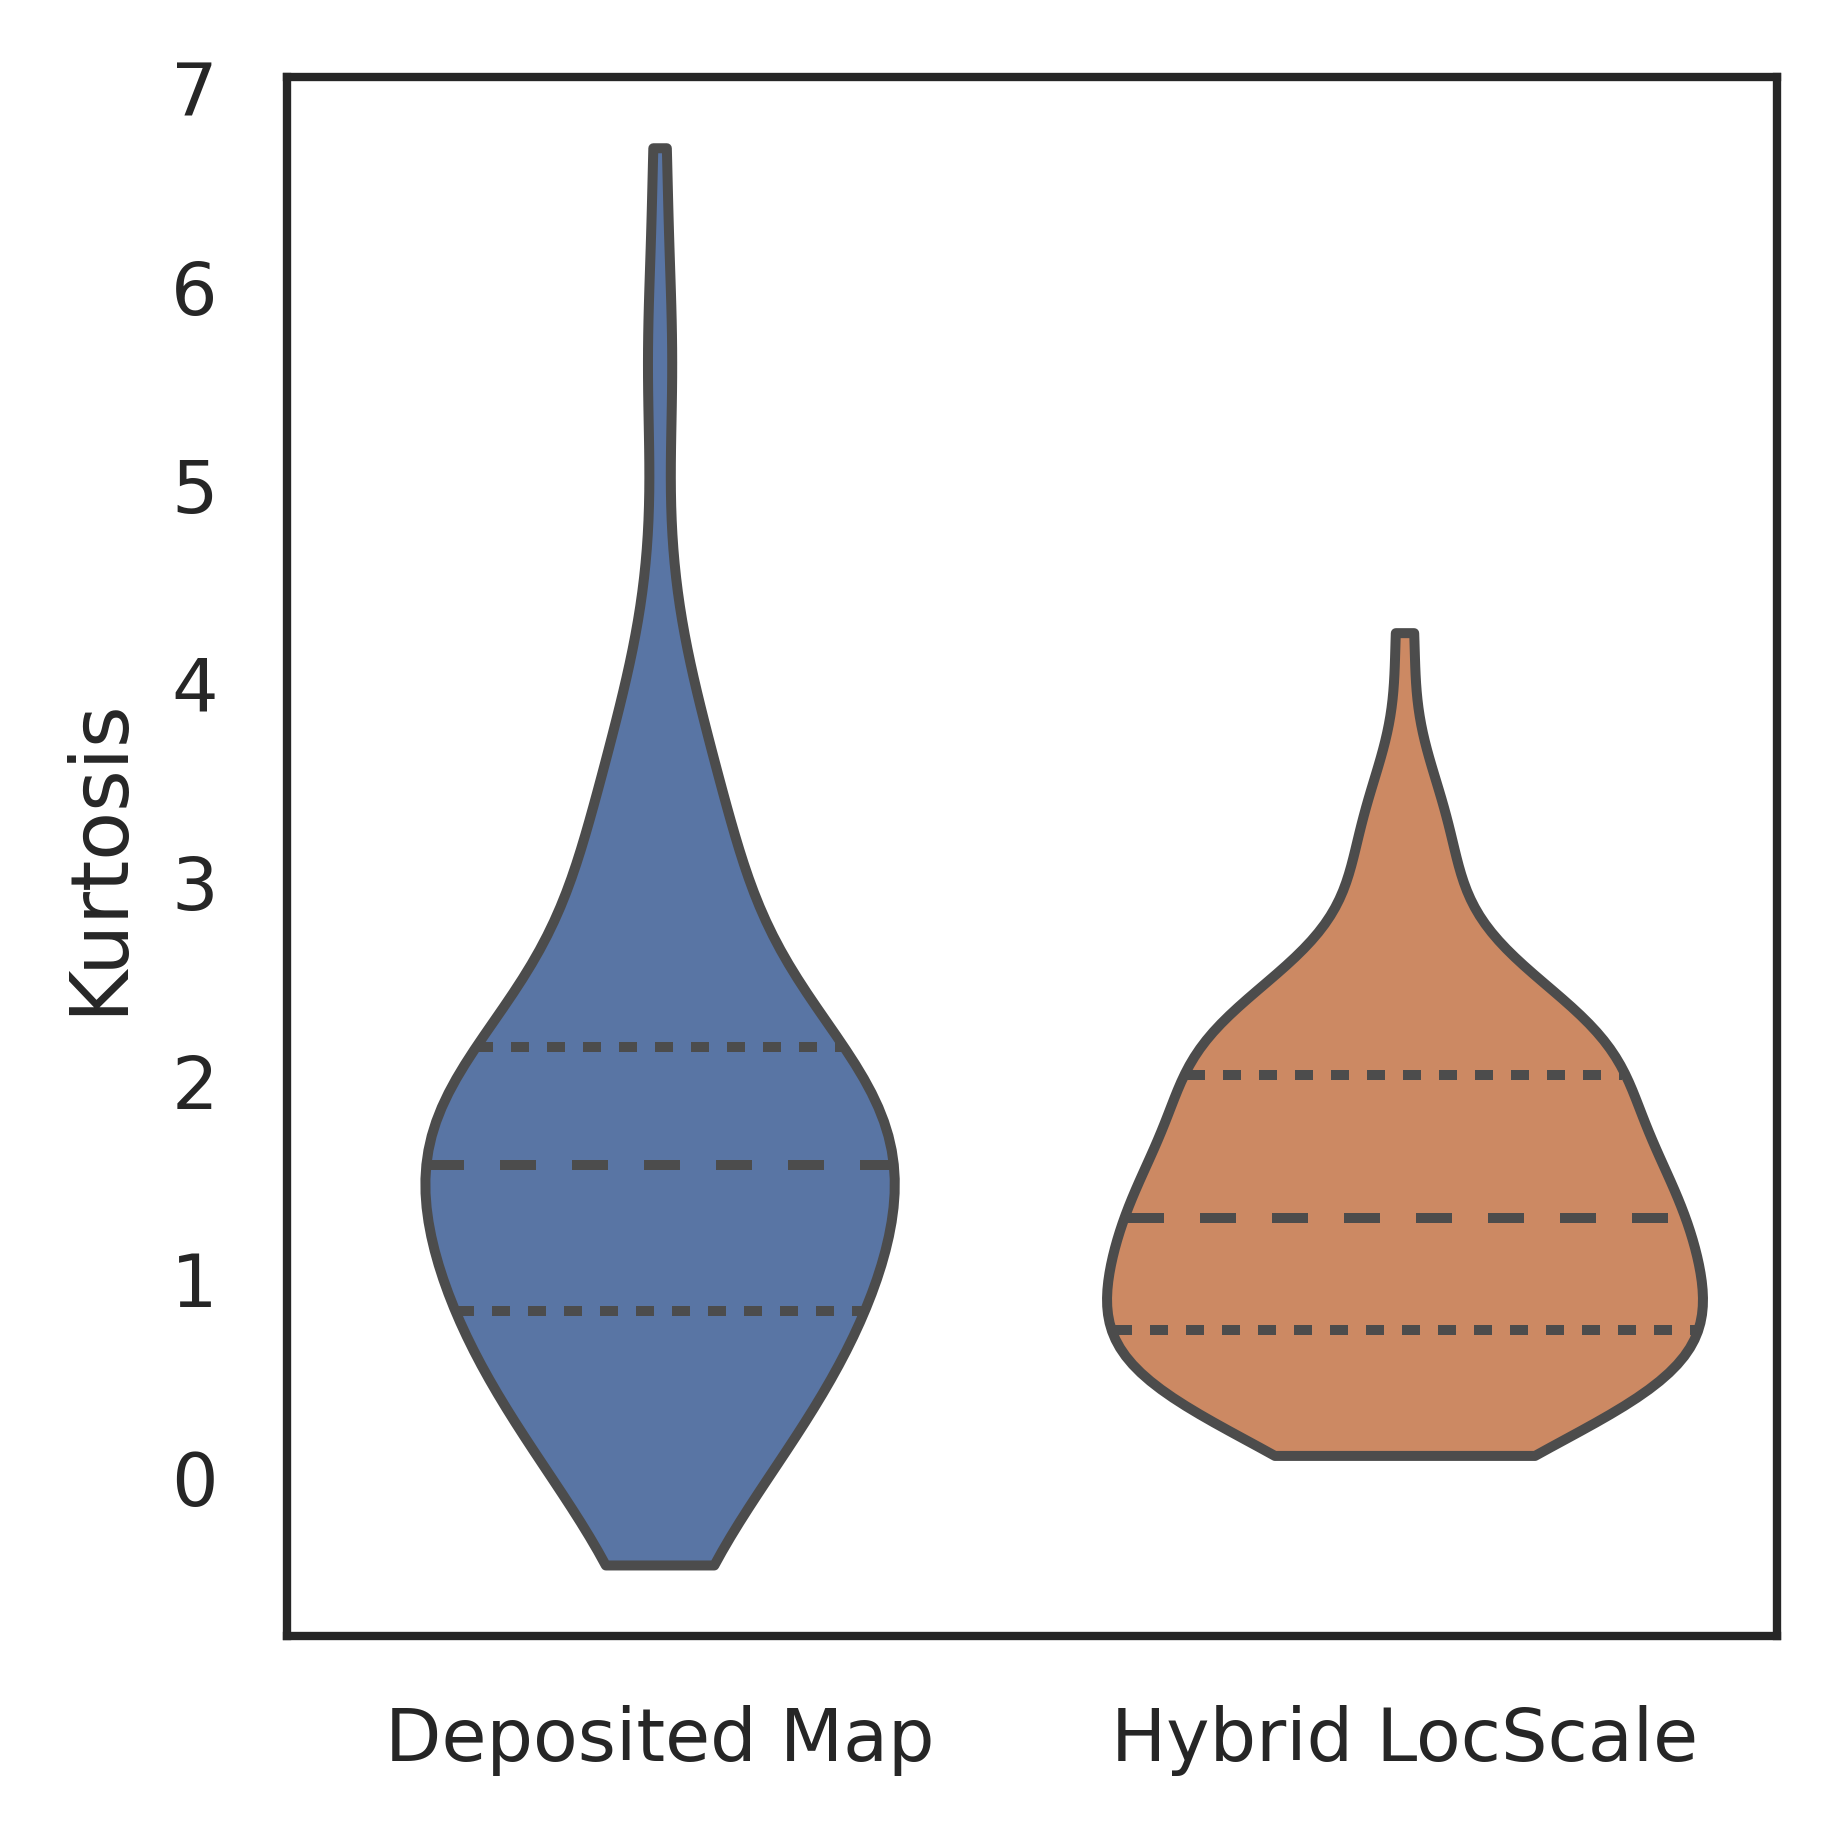

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
kurtosis_metrics_locscale_map = [x[0] for x in results]
kurtosis_metrics_deposited_map = [x[1] for x in results]
rscc_metrics_locscale_map = [x[2] for x in results]
rscc_metrics_deposited_map = [x[3] for x in results]
rscc_metrics_unsharpened_map = [x[4] for x in results]
# Plot the kurtosis metrics for lcoscale and deposited maps as violin plots
figsize_cm = (8, 8)
figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches
fig, ax1 = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality
sns.set_theme(context="paper", font="Helvetica", font_scale=1)
# Set font size for all text in the figure
sns.set_style("white")

## Plot the data
sns.violinplot(data=[kurtosis_metrics_deposited_map, kurtosis_metrics_locscale_map], ax=ax1, inner="quartile", cut=0)
plt.ylabel("Kurtosis")
plt.xticks([0, 1], ["Deposited Map", "Hybrid LocScale"])
plt.tight_layout()
fig.savefig("kurtosis_hybrid_deposited_map.eps", bbox_inches='tight')


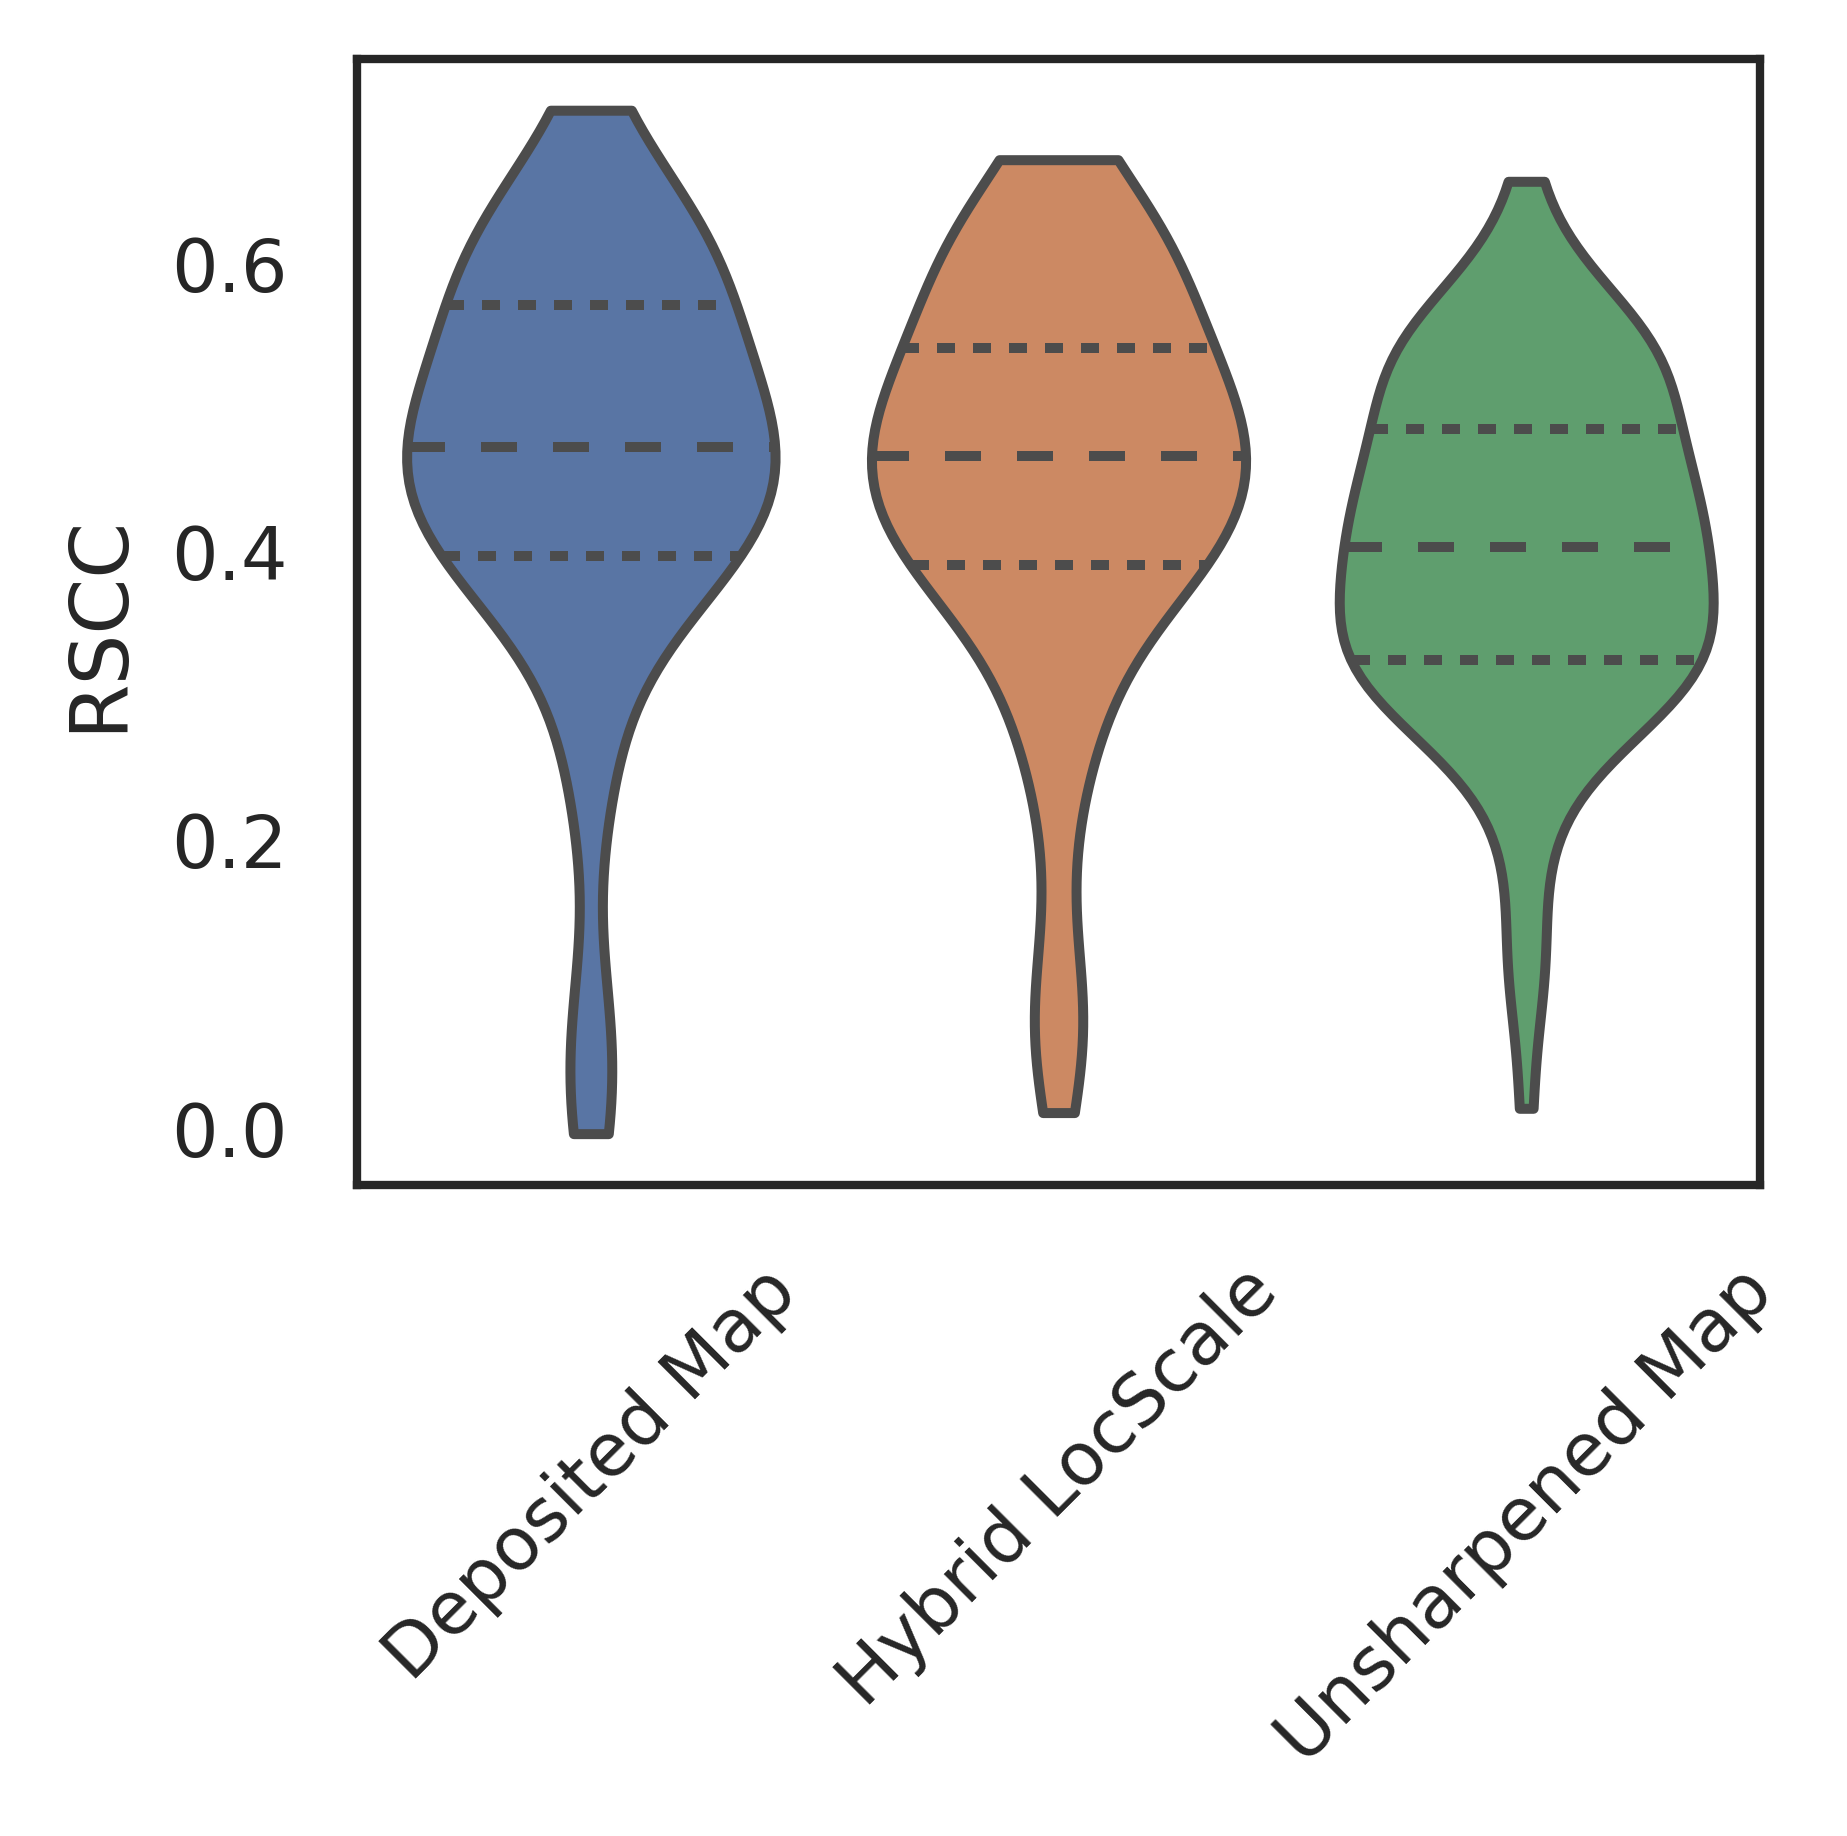

In [ ]:
# Plot the rscc metrics for lcoscale and deposited maps as violin plots
figsize_cm = (8, 8)
figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches

fig, ax1 = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality
sns.set_theme(context="paper", font="Helvetica", font_scale=1)
# Set font size for all text in the figure
sns.set_style("white")

## Plot the data
sns.violinplot(data=[rscc_metrics_deposited_map, rscc_metrics_locscale_map, rscc_metrics_unsharpened_map], ax=ax1, inner="quartile", cut=0)
plt.ylabel("RSCC")
plt.xticks([0, 1, 2], ["Deposited Map", "Hybrid LocScale", "Unsharpened Map"], rotation=45)
plt.tight_layout()
fig.savefig("rscc_hybrid_deposited_map.eps", bbox_inches='tight')

In [ ]:
# Plot the recall scores for lcoscale and deposited maps as violin plots 

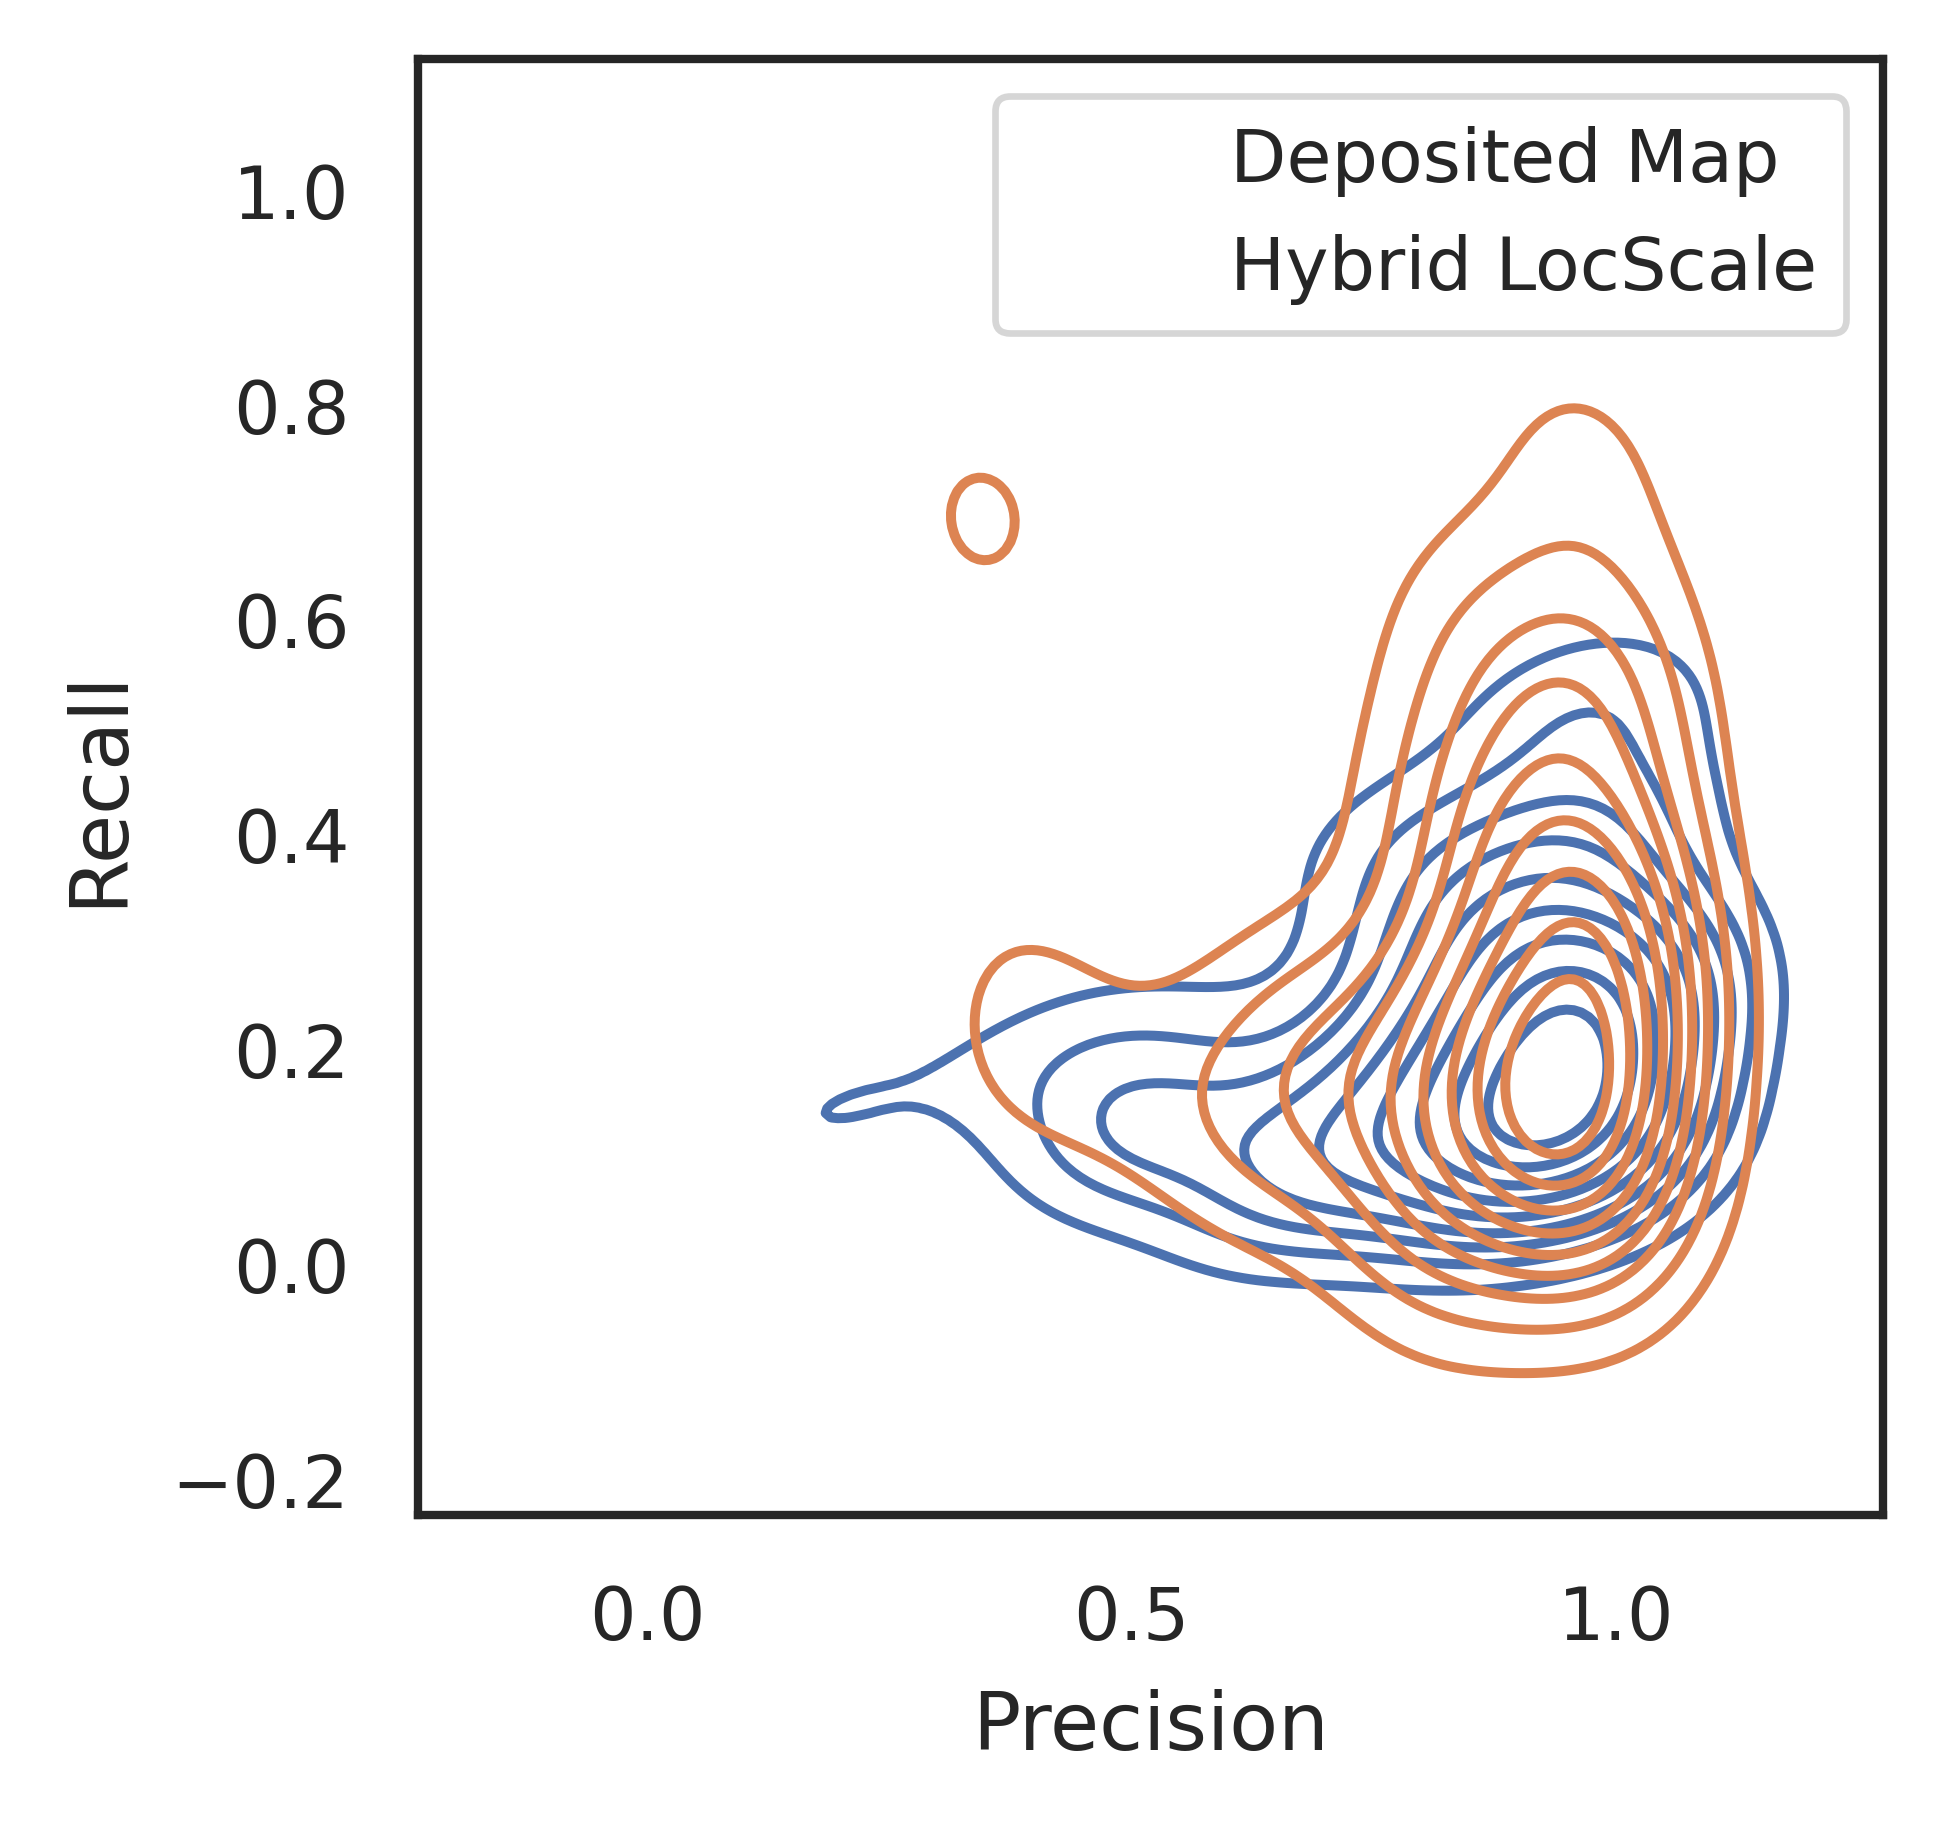

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
fontsize=6
figsize_cm = [8,8]
font = "Helvetica"
fontscale = 1.0    
## Headers
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# set the global font size for the plot

    
plt.rcParams.update({'font.size': fontsize})
figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches

fig, ax1 = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality
sns.set_theme(context="paper", font=font, font_scale=fontscale)
# Set font size for all text in the figure
sns.set_style("white")

## Plot the data

sns.kdeplot(x=deposited_precision, y=deposited_recall, fill=False, thresh=0.1, ax=ax1, label="Deposited Map")
sns.kdeplot(x=model_based_integrated_precision, y=model_based_integrated_recall, fill=False, thresh=0.1, ax=ax1, label="Hybrid LocScale")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()
plt.savefig("precision_recall.png", bbox_inches='tight')


In [ ]:
from scipy.stats import hmean as harmonic_mean
f1_score_unsharpened = []
f1_score_deposited = []
f1_score_model_based = []
f1_score_model_free = []
f1_score_model_based_integrated = []
f1_score_phenix = []

for emdb_id in pr_scores_dict.keys():
    pr_scores = pr_scores_dict[emdb_id]
    try:
        precision_scores_unsharpened = pr_scores['precision']['unsharpened']
        recall_scores_unsharpened = pr_scores['recall']['unsharpened']
        precision_scores_deposited = pr_scores['precision']['deposited']
        recall_scores_deposited = pr_scores['recall']['deposited']
        precision_scores_model_based = pr_scores['precision']['model_based']
        recall_scores_model_based = pr_scores['recall']['model_based']
        precision_scores_model_free = pr_scores['precision']['model_free']
        recall_scores_model_free = pr_scores['recall']['model_free']
        precision_scores_model_based_integrated = pr_scores['precision']['hybrid']
        recall_scores_model_based_integrated = pr_scores['recall']['hybrid']
        precision_scores_phenix = pr_scores['precision']['phenix_sharpened']
        recall_scores_phenix = pr_scores['recall']['phenix_sharpened']

        f1_score_unsharpened.append(harmonic_mean([precision_scores_unsharpened, recall_scores_unsharpened]))
        f1_score_deposited.append(harmonic_mean([precision_scores_deposited, recall_scores_deposited]))
        f1_score_model_based.append(harmonic_mean([precision_scores_model_based, recall_scores_model_based]))
        f1_score_model_free.append(harmonic_mean([precision_scores_model_free, recall_scores_model_free]))
        f1_score_model_based_integrated.append(harmonic_mean([precision_scores_model_based_integrated, recall_scores_model_based_integrated]))
        f1_score_phenix.append(harmonic_mean([precision_scores_phenix, recall_scores_phenix]))
    except:
        print(emdb_id, pr_scores.keys())


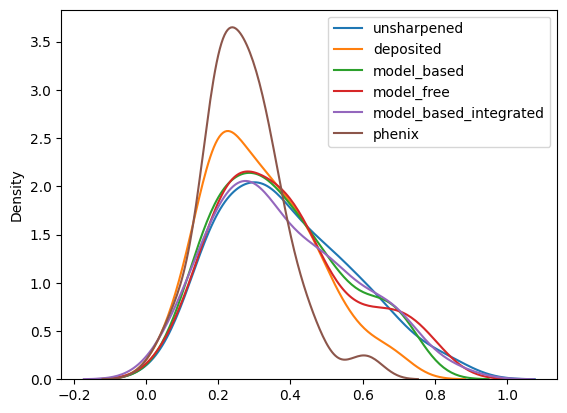

In [ ]:
import matplotlib.pyplot as plt
# plot the f1 score for all the methods as kde plots
sns.kdeplot(x=f1_score_unsharpened, fill=False, thresh=0.1)
sns.kdeplot(x=f1_score_deposited, fill=False, thresh=0.1)
sns.kdeplot(x=f1_score_model_based, fill=False, thresh=0.1)
sns.kdeplot(x=f1_score_model_free, fill=False, thresh=0.1)
sns.kdeplot(x=f1_score_model_based_integrated, fill=False, thresh=0.1)
sns.kdeplot(x=f1_score_phenix, fill=False, thresh=0.1)
plt.legend(['unsharpened', 'deposited', 'model_based', 'model_free', 'model_based_integrated', 'phenix'])

In [ ]:
def pretty_boxplots1(list_of_series, xticks, ylabel,xlabel=None, figsize_cm=(14,8),\
                    fontscale=3,font="Helvetica",linewidth=2, title=None, fontsize=10):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import cm
    import matplotlib
    
    ## Headers
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    # set the global font size for the plot

        
    plt.rcParams.update({'font.size': fontsize})
    figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches
    
    fig, ax1 = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality
    sns.set_theme(context="paper", font=font, font_scale=fontscale)
    # Set font size for all text in the figure
    sns.set_style("white")

    ## Plot the data


    ax1.violinplot(list_of_series, showmedians=True)
    ax1.set_xticklabels(xticks)
    # set xtick labels rotation
    plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    ax1.set_ylabel(ylabel)
    if title is not None:
        ax1.set_title(title)
    if xlabel is not None:
        ax1.set_xlabel(xlabel)
    fig.tight_layout()
    
    return fig

/tmp/ipykernel_735/3166960481.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xticks)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


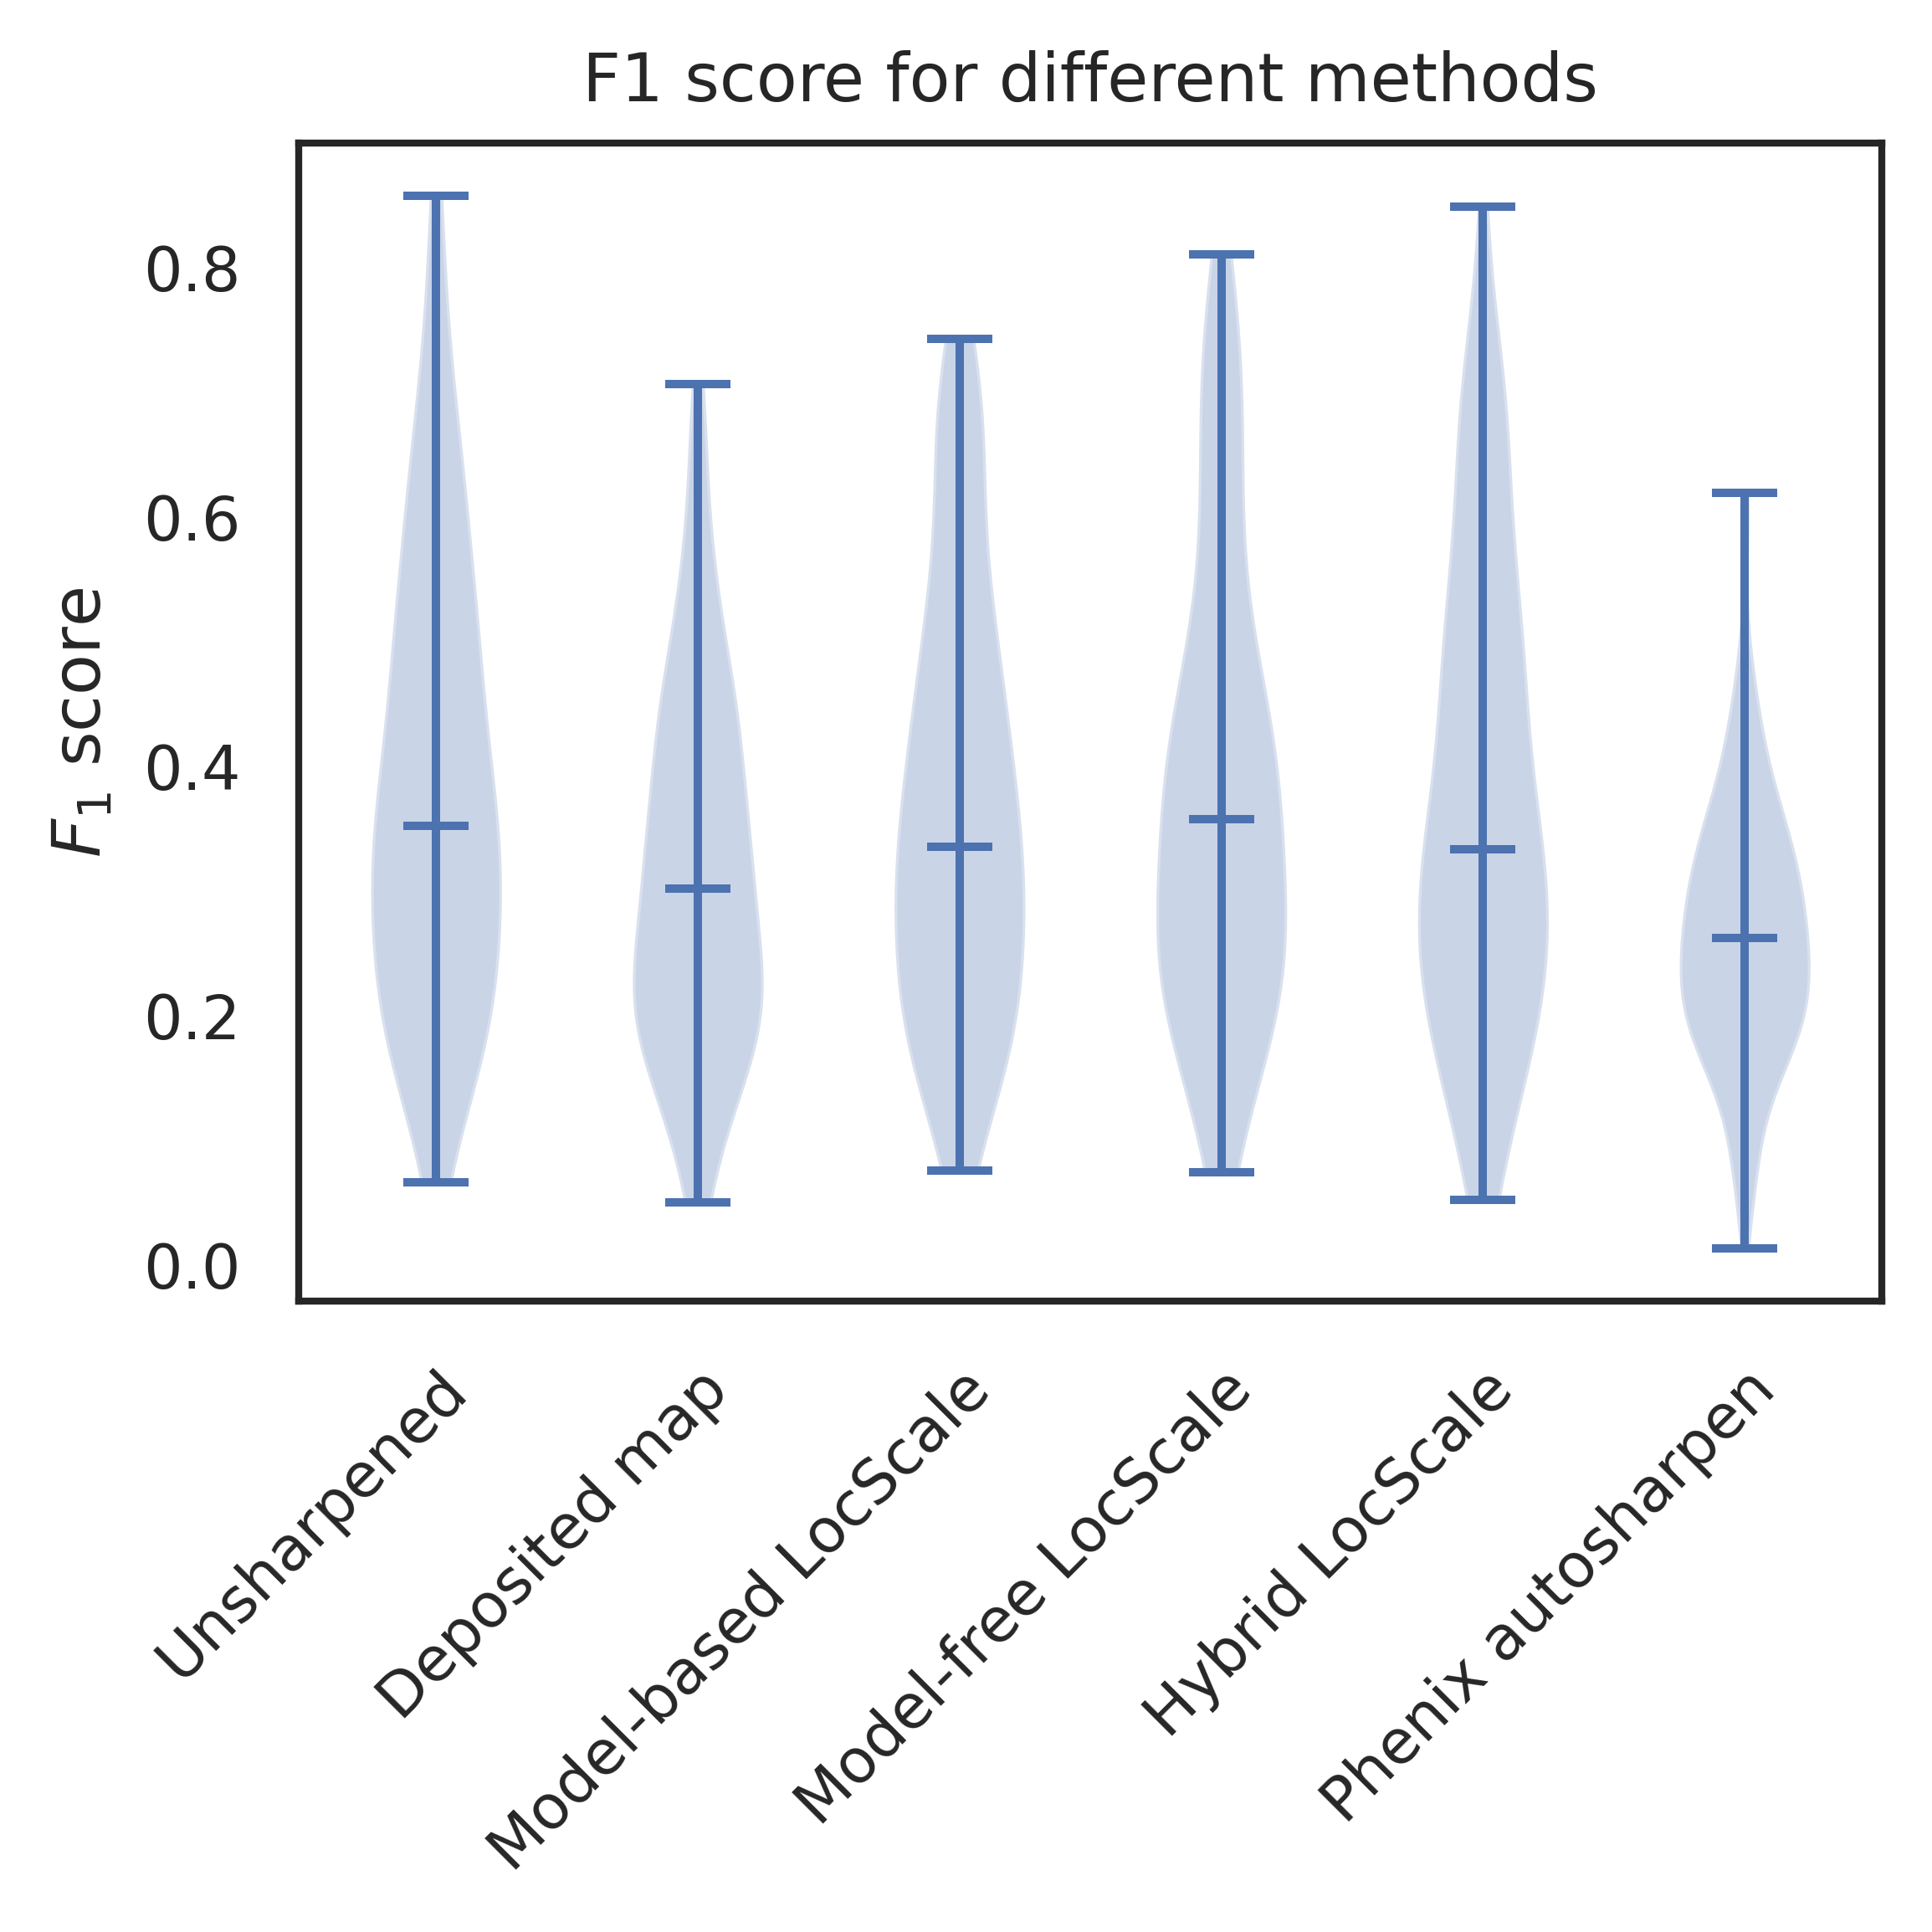

In [ ]:
list_of_lists = [f1_score_unsharpened, f1_score_deposited, f1_score_model_based, f1_score_model_free, f1_score_model_based_integrated, f1_score_phenix]
series_labels = ['Unsharpened','Unsharpened', 'Deposited map', 'Model-based LocScale', 'Model-free LocScale', 'Hybrid LocScale', 'Phenix autosharpen']
fig = pretty_boxplots1(
    list_of_lists,
    xticks=series_labels,
    ylabel='$F_1$ score',
    title='F1 score for different methods',
    figsize_cm=(10, 10),
    fontscale=1,
)

fig.savefig('f1_score_boxplot.eps')